In [10]:
pip uninstall -y pandas


Found existing installation: pandas 2.3.2
Uninstalling pandas-2.3.2:
  Successfully uninstalled pandas-2.3.2
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install "pandas>=2.2.2"

  Using cached pandas-2.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (91 kB)
Using cached pandas-2.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.0 MB)

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /opt/conda/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
print(pd.__version__)

2.3.2


In [13]:
pd.__version__

'2.3.2'

In [14]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import root_mean_squared_error

In [15]:
!pip install pyarrow


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [16]:
pip install --upgrade pandas pyarrow fastparquet


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /opt/conda/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install --upgrade "pandas>=2.2.2" "pyarrow>=15.0.2"



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /opt/conda/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:
df = pd.read_parquet("/workspaces/mlops-zoomcamp/01-intro/data/green_tripdata_2025-01.parquet")
print(df.head())

   VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2025-01-01 00:03:01   2025-01-01 00:17:12                  N   
1         2  2025-01-01 00:19:59   2025-01-01 00:25:52                  N   
2         2  2025-01-01 00:05:29   2025-01-01 00:07:21                  N   
3         2  2025-01-01 00:52:24   2025-01-01 01:07:52                  N   
4         2  2025-01-01 00:25:05   2025-01-01 01:01:10                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0            75           235              1.0           5.93   
1         1.0           166            75              1.0           1.32   
2         5.0           171            73              1.0           0.41   
3         1.0            74           223              1.0           4.12   
4         1.0            66           158              1.0           4.71   

   fare_amount  ...  mta_tax  tip_amount  tolls_amount  ehail_fee  \
0    

In [23]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee
0,2,2025-01-01 00:03:01,2025-01-01 00:17:12,N,1.0,75,235,1.0,5.93,24.70,...,0.5,6.80,0.00,NaN,1.0,34.00,1.0,1.0,0.00,0.0
1,2,2025-01-01 00:19:59,2025-01-01 00:25:52,N,1.0,166,75,1.0,1.32,8.60,...,0.5,0.00,0.00,NaN,1.0,11.10,2.0,1.0,0.00,0.0
2,2,2025-01-01 00:05:29,2025-01-01 00:07:21,N,5.0,171,73,1.0,0.41,25.55,...,0.0,0.00,0.00,NaN,1.0,26.55,2.0,2.0,0.00,0.0
3,2,2025-01-01 00:52:24,2025-01-01 01:07:52,N,1.0,74,223,1.0,4.12,21.20,...,0.5,6.13,6.94,NaN,1.0,36.77,1.0,1.0,0.00,0.0
4,2,2025-01-01 00:25:05,2025-01-01 01:01:10,N,1.0,66,158,1.0,4.71,33.80,...,0.5,7.81,0.00,NaN,1.0,46.86,1.0,1.0,2.75,0.0


In [25]:
df.dtypes

VendorID                          int32
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int32
DOLocationID                      int32
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
cbd_congestion_fee              float64
dtype: object

In [26]:
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [27]:
df.duration

0        14.183333
1         5.883333
2         1.866667
3        15.466667
4        36.083333
           ...    
48321    29.000000
48322     8.000000
48323    21.000000
48324     3.000000
48325     7.000000
Name: duration, Length: 48326, dtype: float64

In [28]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)

In [31]:
df[categorical]

,PULocationID,DOLocationID
0,75,235
1,166,75
2,171,73
3,74,223
4,66,158
...,...,...
48321,179,132
48322,166,75
48323,41,42
48324,75,43


In [33]:
df[numerical]

,trip_distance
0,5.93
1,1.32
2,0.41
3,4.12
4,4.71
...,...
48321,13.99
48322,1.51
48323,2.90
48324,0.34


In [34]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

root_mean_squared_error(y_train, y_pred)

6.704280602105713

/tmp/ipykernel_6587/1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_6587/1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


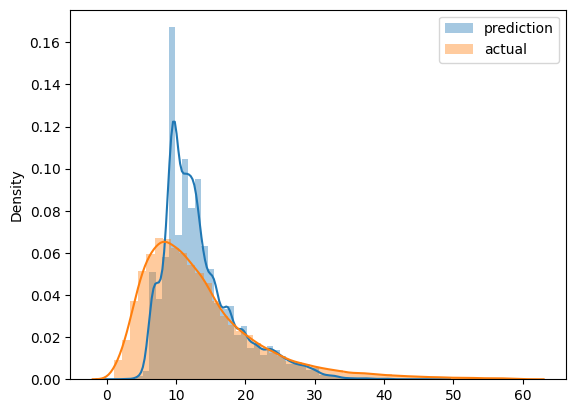

In [35]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [36]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [37]:
df_train = read_dataframe('./data/green_tripdata_2025-01.parquet')
df_val = read_dataframe('./data/green_tripdata_2025-02.parquet')

In [38]:
len(df_train), len(df_val)

(46307, 44218)

In [39]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [40]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [41]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

root_mean_squared_error(y_val, y_pred)

6.09887666573155

In [54]:
import os
os.makedirs("./models", exist_ok=True)

In [56]:
with open('./models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [57]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

root_mean_squared_error(y_val, y_pred)

8.028312781334755